<a href="https://colab.research.google.com/github/martindevoto/machine-learning-notebooks-personal/blob/main/Repaso_PyCaret_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 261 kB 43.8 MB/s 
     |████████████████████████████████| 113 kB 57.2 MB/s 
     |████████████████████████████████| 6.8 MB 39.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.8 MB/s 
     |████████████████████████████████| 1.7 MB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 15.5 MB 16.2 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 58.0 MB/s 
     |████████████████████████████████| 167 kB 62.0 MB/s 
     |████████████████████████████████| 10.1 MB 32.2 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 596 kB 73.2 MB/s 
     |████████████████

In [ ]:
import numpy as np
import pandas as pd

from pycaret.classification import *
from pycaret.utils import  version
from sklearn.datasets import load_iris

In [ ]:
version()

'2.3.5'

In [ ]:
iris = load_iris()

In [ ]:
features = pd.DataFrame(data=load_iris()['data'], 
                     columns=load_iris()['feature_names'])

In [ ]:
target = pd.DataFrame(data=load_iris()['target'], columns=['target'])

In [ ]:
df = features.merge(target, left_index=True, right_index=True)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [ ]:
clf1 = setup(df_train, target='target', session_id=123, log_experiment=True, 
             experiment_name='A ver esto')

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(120, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9875,0.9954,0.9833,0.9906,0.9863,0.9805,0.9826,0.015
qda,Quadratic Discriminant Analysis,0.9625,0.9954,0.9611,0.9667,0.9625,0.9433,0.9452,0.019
nb,Naive Bayes,0.9403,1.0000,0.9389,0.9573,0.9385,0.9099,0.9191,0.016
lr,Logistic Regression,0.9403,1.0000,0.9444,0.9617,0.9375,0.9109,0.9222,0.338
knn,K Neighbors Classifier,0.9292,0.9894,0.9333,0.9250,0.9181,0.8942,0.9112,0.117
ada,Ada Boost Classifier,0.9181,0.9857,0.9167,0.9156,0.9054,0.8766,0.8954,0.091
dt,Decision Tree Classifier,0.9056,0.9317,0.9056,0.9073,0.8929,0.8580,0.8788,0.016
rf,Random Forest Classifier,0.9056,0.9936,0.9056,0.9073,0.8929,0.8580,0.8788,0.469
gbc,Gradient Boosting Classifier,0.9056,0.9353,0.9056,0.9073,0.8929,0.8580,0.8788,0.193
lightgbm,Light Gradient Boosting Machine,0.9056,0.9686,0.9056,0.9073,0.8929,0.8580,0.8788,0.069


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8750,0.9542,0.8333,0.9062,0.8631,0.8049,0.8260
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [ ]:
tuned_lda = tune_model(lda, optimize='F1')

# tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8750,0.9542,0.8333,0.9062,0.8631,0.8049,0.8260
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


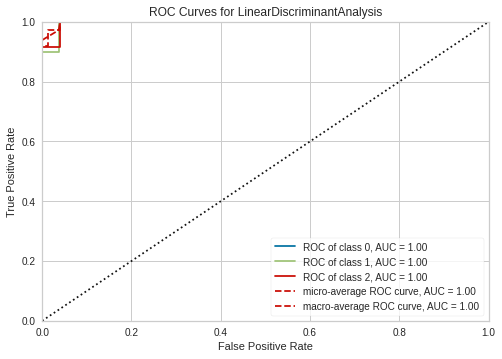

In [ ]:
plot_model(tuned_lda)

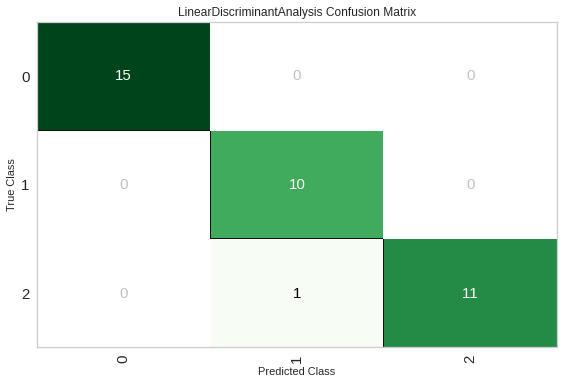

In [ ]:
plot_model(tuned_lda, plot='confusion_matrix')

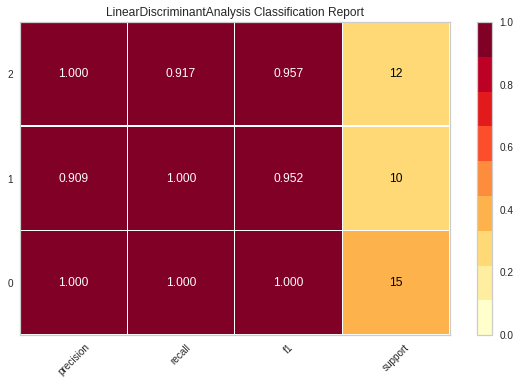

In [ ]:
plot_model(tuned_lda, plot='class_report')

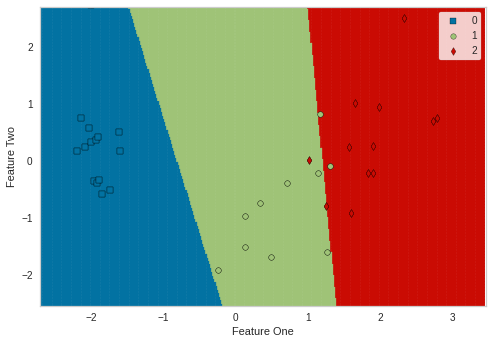

In [ ]:
plot_model(tuned_lda, plot='boundary')

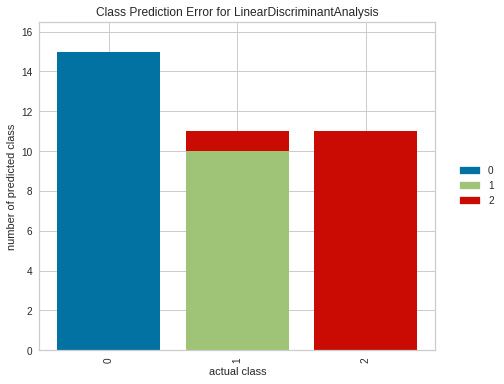

In [ ]:
plot_model(tuned_lda, plot='error')

In [ ]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
unseen_predictions = predict_model(tuned_lda, data=df_test)

In [ ]:
unseen_predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Label,Score
0,4.9,3.0,1.4,0.2,0,0,1.0000
1,5.8,4.0,1.2,0.2,0,0,1.0000
2,5.4,3.4,1.7,0.2,0,0,1.0000
3,5.1,3.7,1.5,0.4,0,0,1.0000
4,4.9,3.6,1.4,0.1,0,0,1.0000
5,4.5,2.3,1.3,0.3,0,0,1.0000
6,5.3,3.7,1.5,0.2,0,0,1.0000
7,6.9,3.1,4.9,1.5,1,1,0.9928
8,4.9,2.4,3.3,1.0,1,1,1.0000
9,6.6,2.9,4.6,1.3,1,1,0.9997
